In [2]:
!pip install scikit-learn

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [8]:
path = r"C:\Users\gkgiz\Desktop\CF\Achievement 6"

In [14]:
df = pd.read_csv(os.path.join(path,'absentee_data_cleaned_wrangled.csv'))

In [16]:
# No further cleaning or wrangling is needed since the data has been processed already 

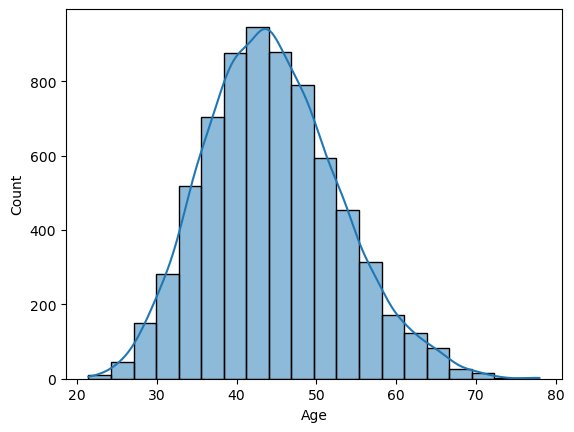

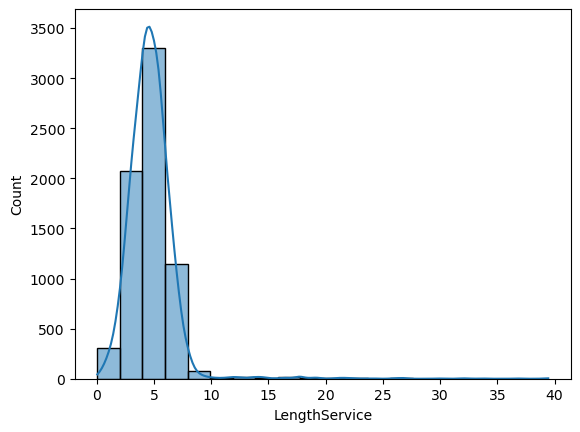

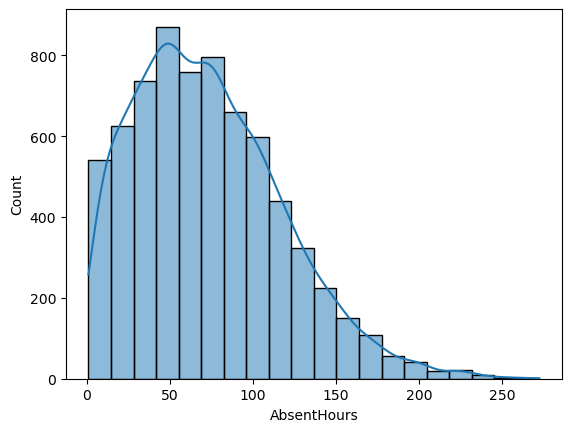

In [22]:
# Extreme values check
sns.histplot(df['Age'], bins=20, kde = True) # shows extreme values for 'age'
plt.show()

sns.histplot(df['LengthService'], bins=20, kde = True) # shows extreme values for 'length of service'
plt.show()

sns.histplot(df['AbsentHours'], bins=20, kde = True) # shows extreme values for 'length of service'
plt.show()

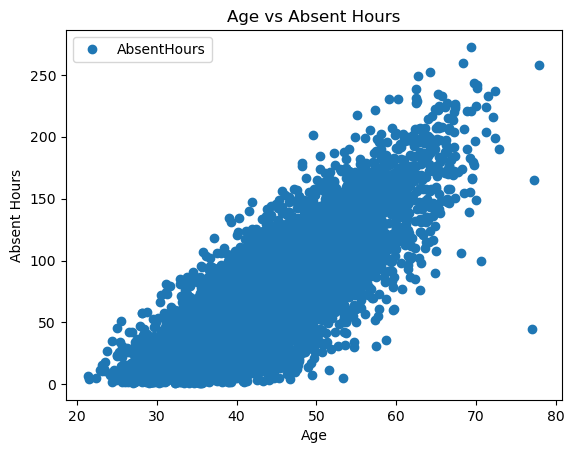

In [24]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Age', y='AbsentHours',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Age vs Absent Hours')  
plt.xlabel('Age')  
plt.ylabel('Absent Hours')  
plt.show()

Hypothesis: There is a positive correlation between age and absenteeism rates, suggesting that older employees are more likely to have higher absenteeism than younger employees.

In [26]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Age'].values.reshape(-1,1)
y = df['AbsentHours'].values.reshape(-1,1)

In [28]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [30]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [32]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [34]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

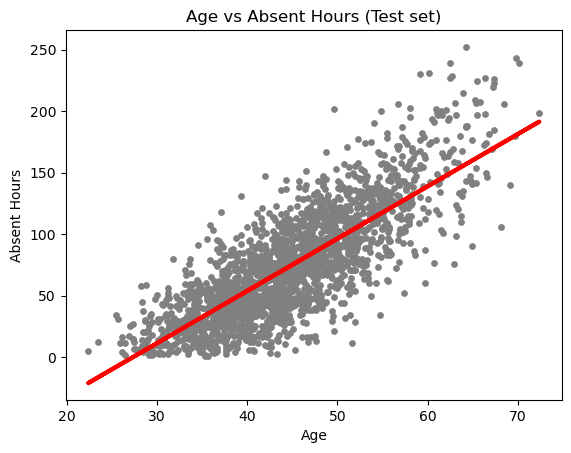

In [36]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Age vs Absent Hours (Test set)')
plot_test.xlabel('Age')
plot_test.ylabel('Absent Hours')
plot_test.show()

Well, we still see a lot of data points, where the age is high but the absent hours is low - which contradicts my hypothesis. Therefore, we need to check this analysis not just visually but also statistically. 

In [40]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [42]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[4.25221373]]
Mean squared error:  711.6828848857753
R2 score:  0.6463480156261554


My slope is positive, which is in line with the original hypothesis, where as the age increases, so does the absent hours. My mean squared error is 711, which is quite high and it could be an indication that this model is not a good fit. The R2 score being 0.64 is not the worst value possible, it is a moderately strong value, so our model can still be a relatively good fit. There is one more manual check that we can conduct, which is making a dataframe of y values and their predicted values.

In [47]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,136.737903,115.242909
1,109.003624,60.570065
2,55.024901,50.952944
3,53.847697,102.768397
4,105.925397,120.475970
5,75.064577,109.562068
6,16.661401,36.400185
7,43.538322,72.735038
8,4.095173,20.171367
9,158.830997,151.262606


* The numbers are quite far off. It is fair to say this model isn’t doing a great job of explaining the relationship between the “Age” and “Absent Hours” variables. The relationship simply doesn’t follow a single, straight regression line (so a single, straight regression line won’t be able to accurately predict anything!).

It’s essential to assess any possible biases when considering the output of a machine learning model, particularly if its predictions relate to people or their attributes. These models attempt to use whatever patterns and relationships they can find—meaning that if there’s any inherent biases in the training data, it will likely be reflected in the results. Training data that’s based on human decisions will almost always contain bias, and unconscious or societal biases are especially difficult to identify and eliminate. Therefore, bias here could manifest itself in multiple ways, including but not limited to: 

Omitted Variables: Factors other than age, such as job role, health conditions, work-life balance, or organizational culture, could influence absenteeism. If these variables are not included, the model may attribute variations in absent hours to age alone, introducing bias.

Age Group Distribution: If the dataset is not well-balanced across different age groups (e.g., more young employees than older ones), the model might not capture patterns accurately across the entire age range. 

Outliers or Extreme Values: Employees with unusually high or low absenteeism, for reasons unrelated to age, can skew the results. 

In this case, it is a valuable point of discussion to see if it was a really good idea to remove everyone with an absent hours value of 0, since it might have actually skewed the results. 